In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [35]:
df5 = pd.read_csv('df5.csv')

In [14]:
print(df5.head()) 

   Year      Country  Total_Medals  Host_or_Not Country_Code   GDP_PCA  \
0  2008  Afghanistan             1            0          AFG -0.484561   
1  2012  Afghanistan             1            0          AFG -0.478765   
2  1992      Algeria             2            0          ALG -0.434253   
3  1996      Algeria             3            0          ALG -0.443431   
4  2000      Algeria             5            0          ALG -0.437493   

   population_PCA  income_PCA  athletes_PCA  population_growth_zscore  \
0       -0.286233   -1.237388     -1.416809                  0.932791   
1       -0.262288   -1.216370     -1.382949                  2.676930   
2       -0.260524   -1.122219     -0.982663                  1.202921   
3       -0.250034   -1.144281     -0.904040                  0.731920   
4       -0.243021   -1.134961     -0.745505                  0.428501   

   GDP_growth_zscore  HDI_zscore  Region_Europe and Central Asia  \
0           0.334188   -2.382543                

### Load Original File 

In [4]:
df_original = pd.read_csv('summary.csv', encoding='ISO-8859-1')

In [5]:
df_original.loc[df_original['Country_Code'] == 'ROC', 'Country'] = 'Russia'

# Verify the update
print(df_original[df_original['Country_Code'] == 'ROC'])

     Year Country  Total_Medals  Gold_Medals  Silver_Medals  Bronze_Medals  \
539  2020  Russia            71           20             28             23   

     Total_Athletes  Events_Count  Host_or_Not Country_Code  population_total  \
539             318           204            0          ROC         145245148   

     population_growth  GNI_per_capita           GDP  GDP_growth  \
539          -0.143202           10660  1.493080e+12   -2.653655   

                      Region  GDP_per_capita  Population_Percentage  \
539  Europe and Central Asia     10108.32715               0.018664   

     GDP_Percentage    HDI  
539        0.017661  0.824  


In [6]:
df_original

,Year,Country,Total_Medals,Gold_Medals,Silver_Medals,Bronze_Medals,Total_Athletes,Events_Count,Host_or_Not,Country_Code,population_total,population_growth,GNI_per_capita,GDP,GDP_growth,Region,GDP_per_capita,Population_Percentage,GDP_Percentage,HDI
0,2008,Afghanistan,1,0,0,1,4,4,0,AFG,26427200,2.002330,370,1.010930e+10,3.924980,South Asia,382.534000,0.003906,0.000159,0.437
1,2012,Afghanistan,1,0,0,1,6,6,0,AFG,30466500,4.077630,640,1.990730e+10,12.752300,South Asia,653.417000,0.004288,0.000265,0.482
2,1992,Algeria,2,1,0,1,35,27,0,ALG,26748300,2.323750,1920,4.800310e+10,1.800000,Middle East and North Africa,1794.620000,0.004918,0.001912,0.587
3,1996,Algeria,3,2,0,1,45,29,0,ALG,28984600,1.763320,1530,4.694160e+10,4.100000,Middle East and North Africa,1619.530000,0.005015,0.001489,0.608
4,2000,Algeria,5,1,1,3,47,42,0,ALG,30774600,1.402290,1610,5.479040e+10,3.800000,Middle East and North Africa,1780.380000,0.005036,0.001637,0.644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,2020,Ghana,1,0,0,1,14,6,0,GHA,32180401,2.066269,2230,7.004310e+10,0.513942,Sub-Saharan Africa,2176.576218,0.004135,0.000829,0.611
622,2020,Grenada,1,0,0,1,6,2,0,GRD,123663,0.762219,7890,1.043411e+09,-13.756622,Latin America and Caribbean,8437.536782,0.000016,0.000012,0.779
623,2020,Kuwait,1,0,0,1,10,4,0,KWT,4360444,-1.832821,32790,1.075130e+11,-5.274021,Middle East and North Africa,24656.433710,0.000560,0.001272,0.806
624,2020,Moldova,1,0,0,1,19,16,0,MDA,2635130,-1.098032,4360,1.153075e+10,-8.275978,Europe and Central Asia,4375.778893,0.000339,0.000136,0.769


In [8]:

# Group by 'Year' and sum the 'Total_Medals' for each year
event_count_by_year = df_original.groupby('Year')['Total_Medals'].sum().reset_index()

print(event_count_by_year)

   Year  Total_Medals
0  1992           672
1  1996           832
2  2000           918
3  2004           920
4  2008           951
5  2012           956
6  2016           961
7  2020          1075


In [ ]:
### Want add Concition to this 

In [53]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df5 is your DataFrame containing all data

# Define train and test data based on the year
train_data = df5[(df5['Year'] >= 1992) & (df5['Year'] <= 2016)]
test_data = df5[df5['Year'] == 2020]

# Define features and target variable for training
X_train = train_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])
y_train = train_data['Total_Medals']  # Using original target variable without normalization

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Define features for testing
X_test = test_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])

# Make predictions
predictions = model.predict(X_test)

# Ensure predictions are non-negative integers
predictions = np.maximum(predictions, 0)  # Set minimum value to 0
predictions = predictions.astype(int)      # Convert to integers

# Add predictions to the test_data DataFrame
test_data['Predicted_Medals'] = predictions

# Select relevant columns for final output
final_output = test_data[['Country', 'Predicted_Medals', 'Total_Medals']]
print(final_output)

# Calculate R-squared and Adjusted R-squared for the test set
y_test_actual = test_data['Total_Medals']
r_squared_test = r2_score(y_test_actual, predictions)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (len(y_test_actual) - 1) / (len(y_test_actual) - X_test.shape[1] - 1)

# Calculate Standard Error for the test set
standard_error_test = np.sqrt(mean_squared_error(y_test_actual, predictions))

# Calculate MSE for the training set
train_predictions = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

# Calculate R-squared for the training set
train_r_squared = r2_score(y_train, train_predictions)

# Print performance metrics
print(f'Test Set Multiple R: {np.sqrt(r_squared_test)}')  # R is the square root of R²
print(f'Test Set R-squared (R²): {r_squared_test}')
print(f'Test Set Adjusted R-squared: {adjusted_r_squared_test}')
print(f'Test Set Standard Error: {standard_error_test}')
print(f'Training Set Mean Squared Error (MSE): {train_mse}')


            Country  Predicted_Medals  Total_Medals
535   United States               112           113
536           China                91            88
537           Japan                54            58
538  United kingdom                35            65
539          Russia                35            71
..              ...               ...           ...
621           Ghana                 0             1
622         Grenada                 0             1
623          Kuwait                 0             1
624         Moldova                 0             1
625           Syria                 0             1

[91 rows x 3 columns]
Test Set Multiple R: 0.9283165192587096
Test Set R-squared (R²): 0.8617715599286062
Test Set Adjusted R-squared: 0.8363084262312441
Test Set Standard Error: 7.118309467164916
Training Set Mean Squared Error (MSE): 55.614002623686325


C:\Users\Asus\AppData\Local\Temp\ipykernel_26372\3632164858.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Medals'] = predictions


In [ ]:
# RF

In [52]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df5 is your DataFrame containing all data
df5 = pd.read_csv('df5.csv')
# Define train and test data based on the year
train_data = df5[(df5['Year'] >= 1992) & (df5['Year'] <= 2016)]
test_data = df5[df5['Year'] == 2020]

# Define features and target variable for training
X_train = train_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])
y_train = train_data['Total_Medals']  # Using original target variable without normalization

# Initialize the Random Forest model
model = RandomForestRegressor()  
# Fit the model
model.fit(X_train, y_train)

# Define features for testing
X_test = test_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])

# Make predictions
predictions = model.predict(X_test)

# Ensure predictions are non-negative integers
predictions = np.maximum(predictions, 0)  # Set minimum value to 0
predictions = predictions.astype(int)      # Convert to integers

# Add predictions to the test_data DataFrame
test_data['Predicted_Medals'] = predictions

# Select relevant columns for final output
final_output = test_data[['Country', 'Predicted_Medals', 'Total_Medals']]
print(final_output)

# Calculate R-squared and Adjusted R-squared for the test set
y_test_actual = test_data['Total_Medals']
r_squared_test = r2_score(y_test_actual, predictions)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (len(y_test_actual) - 1) / (len(y_test_actual) - X_test.shape[1] - 1)

# Calculate Standard Error for the test set
standard_error_test = np.sqrt(mean_squared_error(y_test_actual, predictions))

# Calculate MSE for the training set
train_predictions = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

# Print performance metrics
print(f'Test Set Multiple R: {np.sqrt(r_squared_test)}')  # R is the square root of R²
print(f'Test Set R-squared (R²): {r_squared_test}')
print(f'Test Set Adjusted R-squared: {adjusted_r_squared_test}')
print(f'Test Set Standard Error: {standard_error_test}')
print(f'Training Set Mean Squared Error (MSE): {train_mse}')


            Country  Predicted_Medals  Total_Medals
535   United States               107           113
536           China                72            88
537           Japan                79            58
538  United kingdom                39            65
539          Russia                44            71
..              ...               ...           ...
621           Ghana                 1             1
622         Grenada                 2             1
623          Kuwait                 2             1
624         Moldova                 2             1
625           Syria                 1             1

[91 rows x 3 columns]
Test Set Multiple R: 0.9433085094442556
Test Set R-squared (R²): 0.8898309439899432
Test Set Adjusted R-squared: 0.869536644198617
Test Set Standard Error: 6.354889093022425
Training Set Mean Squared Error (MSE): 5.001277383177571


C:\Users\Asus\AppData\Local\Temp\ipykernel_26372\787927593.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Medals'] = predictions


#### Y with condition -LR
* the predicted medals count should equal the total medals count for the test set, you can modify the predictions by ensuring that the sum of predicted medals equals the sum of actual total medals in the test set. 

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df5 is your DataFrame containing all data

# Define train and test data based on the year
train_data = df5[(df5['Year'] >= 1992) & (df5['Year'] <= 2016)]
test_data = df5[df5['Year'] == 2020]

# Define features and target variable for training
X_train = train_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])
y_train = train_data['Total_Medals']  # Using original target variable without normalization

# Initialize the Linear Regression model
model = LinearRegression()
# Fit the model
model.fit(X_train, y_train)

# Define features for testing
X_test = test_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])

# Make predictions
predictions = model.predict(X_test)

# Ensure predictions are non-negative
predictions = np.maximum(predictions, 0)  # Set minimum value to 0

# Adjust predictions to match total medals count in the test data
total_actual_medals = test_data['Total_Medals'].sum()
total_predicted_medals = predictions.sum()

# Scale predictions proportionally to match the total actual medals count
if total_predicted_medals > 0:
    scaling_factor = total_actual_medals / total_predicted_medals
    predictions = predictions * scaling_factor

# Ensure predictions are integers after scaling
predictions = np.rint(predictions).astype(int)  # Round and convert to integers

# Add predictions to the test_data DataFrame
test_data['Predicted_Medals'] = predictions

# Select relevant columns for final output
final_output = test_data[['Country', 'Predicted_Medals', 'Total_Medals']]
print(final_output)

# Calculate R-squared and Adjusted R-squared for the test set
y_test_actual = test_data['Total_Medals']
r_squared_test = r2_score(y_test_actual, predictions)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (len(y_test_actual) - 1) / (len(y_test_actual) - X_test.shape[1] - 1)

# Calculate Standard Error for the test set
standard_error_test = np.sqrt(mean_squared_error(y_test_actual, predictions))

# Calculate MSE for the training set
train_predictions = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

# Calculate R-squared for the training set
train_r_squared = r2_score(y_train, train_predictions)

# Print performance metrics
print(f'Test Set Multiple R: {np.sqrt(r_squared_test)}')  # R is the square root of R²
print(f'Test Set R-squared (R²): {r_squared_test}')
print(f'Test Set Adjusted R-squared: {adjusted_r_squared_test}')
print(f'Test Set Standard Error: {standard_error_test}')
print(f'Training Set Mean Squared Error (MSE): {train_mse}')


            Country  Predicted_Medals  Total_Medals
535   United States               152           113
536           China               124            88
537           Japan                73            58
538  United kingdom                48            65
539          Russia                48            71
..              ...               ...           ...
621           Ghana                 0             1
622         Grenada                 0             1
623          Kuwait                 0             1
624         Moldova                 0             1
625           Syria                 0             1

[91 rows x 3 columns]
Test Set Multiple R: 0.8892602074147802
Test Set R-squared (R²): 0.7907837164913778
Test Set Adjusted R-squared: 0.752243874792421
Test Set Standard Error: 8.757414441049807
Training Set Mean Squared Error (MSE): 55.614002623686325


C:\Users\Asus\AppData\Local\Temp\ipykernel_26372\226403710.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Medals'] = predictions


#### Y with condition -RF
* the predicted medals count should equal the total medals count for the test set, you can modify the predictions by ensuring that the sum of predicted medals equals the sum of actual total medals in the test set. 

In [56]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Assuming df5 is your DataFrame containing all data
df5 = pd.read_csv('df5.csv')
# Define train and test data based on the year
train_data = df5[(df5['Year'] >= 1992) & (df5['Year'] <= 2016)]
test_data = df5[df5['Year'] == 2020]

# Define features and target variable for training
X_train = train_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])
y_train = train_data['Total_Medals']  # Using original target variable without normalization

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Define features for testing
X_test = test_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])

# Make predictions
predictions = model.predict(X_test)

# Ensure predictions are non-negative
predictions = np.maximum(predictions, 0)  # Set minimum value to 0

# Adjust predictions to match total medals count in the test data
total_actual_medals = test_data['Total_Medals'].sum()
total_predicted_medals = predictions.sum()

# Scale predictions proportionally to match the total actual medals count
if total_predicted_medals > 0:
    scaling_factor = total_actual_medals / total_predicted_medals
    predictions = predictions * scaling_factor

# Ensure predictions are integers after scaling
predictions = np.rint(predictions).astype(int)  # Round and convert to integers

# Add predictions to the test_data DataFrame
test_data['Predicted_Medals'] = predictions

# Select relevant columns for final output
final_output = test_data[['Country', 'Predicted_Medals', 'Total_Medals']]
print(final_output)

# Calculate R-squared and Adjusted R-squared for the test set
y_test_actual = test_data['Total_Medals']
r_squared_test = r2_score(y_test_actual, predictions)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (len(y_test_actual) - 1) / (len(y_test_actual) - X_test.shape[1] - 1)

# Calculate Standard Error for the test set
standard_error_test = np.sqrt(mean_squared_error(y_test_actual, predictions))

# Calculate MSE for the training set
train_predictions = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

# Calculate R-squared for the training set
train_r_squared = r2_score(y_train, train_predictions)

# Print performance metrics
print(f'Test Set Multiple R: {np.sqrt(r_squared_test)}')  # R is the square root of R²
print(f'Test Set R-squared (R²): {r_squared_test}')
print(f'Test Set Adjusted R-squared: {adjusted_r_squared_test}')
print(f'Test Set Standard Error: {standard_error_test}')
print(f'Training Set Mean Squared Error (MSE): {train_mse}')


            Country  Predicted_Medals  Total_Medals
535   United States               128           113
536           China                80            88
537           Japan                91            58
538  United kingdom                50            65
539          Russia                49            71
..              ...               ...           ...
621           Ghana                 1             1
622         Grenada                 3             1
623          Kuwait                 3             1
624         Moldova                 3             1
625           Syria                 1             1

[91 rows x 3 columns]
Test Set Multiple R: 0.9453560719066146
Test Set R-squared (R²): 0.8936981026907044
Test Set Adjusted R-squared: 0.874116174238992
Test Set Standard Error: 6.2423579653070975
Training Set Mean Squared Error (MSE): 5.349440747663553


C:\Users\Asus\AppData\Local\Temp\ipykernel_26372\3726461946.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Medals'] = predictions


### Currently Best Model

### Code with best parameters Found 

* model = RandomForestRegressor(
    * n_estimators=500,
    * max_depth=20,
    * max_features='sqrt',
    * min_samples_split=2,
    * min_samples_leaf=1,
    * random_state=42
)

In [55]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df5 is your DataFrame containing all data
df5 = pd.read_csv('df5.csv')

# Define train and test data based on the year
train_data = df5[(df5['Year'] >= 1992) & (df5['Year'] <= 2016)]
test_data = df5[df5['Year'] == 2020]

# Define features and target variable for training
X_train = train_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])
y_train = train_data['Total_Medals']  # Using original target variable without normalization

# Initialize the Random Forest model with the best parameters
model = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Fit the model
model.fit(X_train, y_train)

# Define features for testing
X_test = test_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])

# Make predictions
predictions = model.predict(X_test)

# Ensure predictions are non-negative
predictions = np.maximum(predictions, 0)  # Set minimum value to 0

# Adjust predictions to match total medals count in the test data
total_actual_medals = test_data['Total_Medals'].sum()
total_predicted_medals = predictions.sum()

# Scale predictions proportionally to match the total actual medals count
if total_predicted_medals > 0:
    scaling_factor = total_actual_medals / total_predicted_medals
    predictions = predictions * scaling_factor

# Ensure predictions are integers after scaling
predictions = np.rint(predictions).astype(int)  # Round and convert to integers

# Add predictions to the test_data DataFrame
test_data['Predicted_Medals'] = predictions

# Select relevant columns for final output
final_output = test_data[['Country', 'Predicted_Medals', 'Total_Medals']]
print(final_output)

# Calculate R-squared and Adjusted R-squared for the test set
y_test_actual = test_data['Total_Medals']
r_squared_test = r2_score(y_test_actual, predictions)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (len(y_test_actual) - 1) / (len(y_test_actual) - X_test.shape[1] - 1)

# Calculate Standard Error for the test set
standard_error_test = np.sqrt(mean_squared_error(y_test_actual, predictions))

# Calculate MSE for the training set
train_predictions = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

# Calculate R-squared for the training set
train_r_squared = r2_score(y_train, train_predictions)

# Print performance metrics
print(f'Test Set Multiple R: {np.sqrt(r_squared_test)}')  # R is the square root of R²
print(f'Test Set R-squared (R²): {r_squared_test}')
print(f'Test Set Adjusted R-squared: {adjusted_r_squared_test}')
print(f'Test Set Standard Error: {standard_error_test}')
print(f'Training Set Mean Squared Error (MSE): {train_mse}')


            Country  Predicted_Medals  Total_Medals
535   United States               115           113
536           China                76            88
537           Japan                64            58
538  United kingdom                43            65
539          Russia                48            71
..              ...               ...           ...
621           Ghana                 3             1
622         Grenada                 4             1
623          Kuwait                 3             1
624         Moldova                 3             1
625           Syria                 2             1

[91 rows x 3 columns]
Test Set Multiple R: 0.9543822630694272
Test Set R-squared (R²): 0.9108455040615213
Test Set Adjusted R-squared: 0.8944223074412753
Test Set Standard Error: 5.716757707067764
Training Set Mean Squared Error (MSE): 5.327314522278607


C:\Users\Asus\AppData\Local\Temp\ipykernel_26372\1808041534.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Medals'] = predictions


In [27]:
final_output.head(20)

,Country,Predicted_Medals,Total_Medals
535,United States,113,113
536,China,82,88
537,Japan,64,58
538,United kingdom,55,65
539,Russia,60,71
540,Australia,43,46
541,Netherlands,28,36
542,France,36,33
543,Germany,42,37
544,Italy,39,40



### plot for first 20 countries actual vs predicted

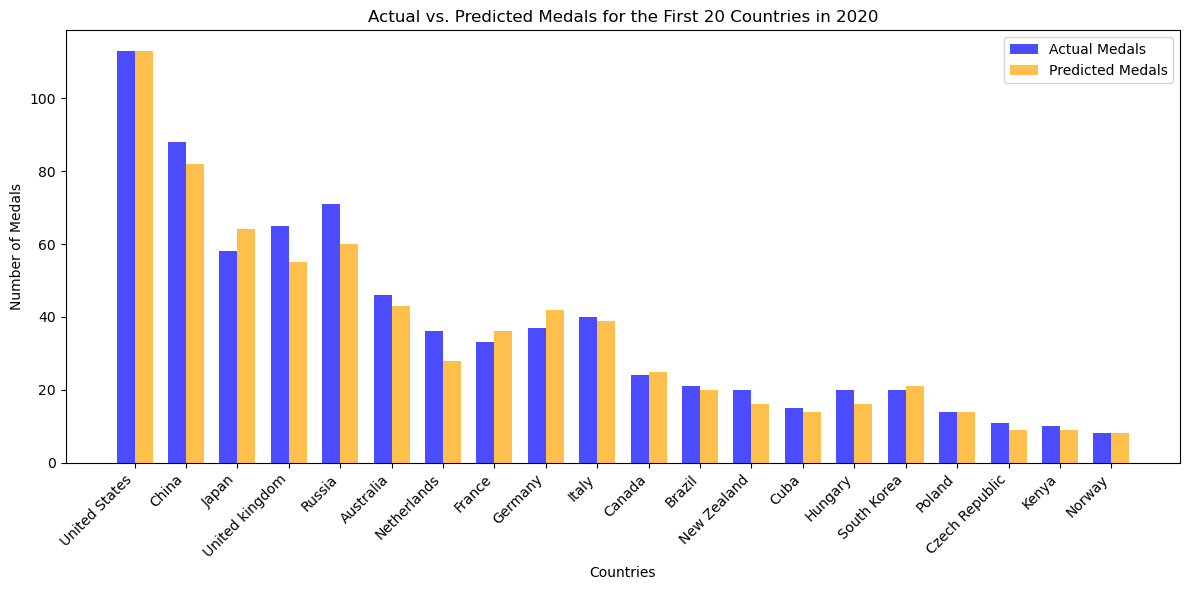

In [30]:
import matplotlib.pyplot as plt

# Prepare data for plotting for the first 20 countries
first_20_countries = test_data.head(20)  # Get the first 20 rows
countries = first_20_countries['Country']
actual_medals = first_20_countries['Total_Medals']
predicted_medals = first_20_countries['Predicted_Medals']

# Set up the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(countries))

# Create bars for actual and predicted values
bar1 = plt.bar(index, actual_medals, bar_width, label='Actual Medals', color='blue', alpha=0.7)
bar2 = plt.bar(index + bar_width, predicted_medals, bar_width, label='Predicted Medals', color='orange', alpha=0.7)

# Adding titles and labels
plt.title('Actual vs. Predicted Medals for the First 20 Countries in 2020')
plt.xlabel('Countries')
plt.ylabel('Number of Medals')
plt.xticks(index + bar_width / 2, countries, rotation=45, ha='right')  # Rotate country labels
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


#### Y (Normalize) with condition -LR
* the predicted medals count should equal the total medals count for the test set, you can modify the predictions by ensuring that the sum of predicted medals equals the sum of actual total medals in the test set. 

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Assuming df5 is your DataFrame containing all data
df5 = pd.read_csv('df5.csv')
# Z-score normalization of the target variable
df5['Total_Medals_Z'] = zscore(df5['Total_Medals'])

# Define train and test data based on the year
train_data = df5[(df5['Year'] >= 1992) & (df5['Year'] <= 2016)]
test_data = df5[df5['Year'] == 2020]

# Define features and target variable for training
X_train = train_data.drop(columns=['Total_Medals', 'Total_Medals_Z', 'Year', 'Country', 'Country_Code'])
y_train = train_data['Total_Medals_Z']

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Define features for testing
X_test = test_data.drop(columns=['Total_Medals', 'Total_Medals_Z', 'Year', 'Country', 'Country_Code'])

# Make predictions
test_predictions_z = model.predict(X_test)

# Convert predictions back to original scale using the mean and std from the training data
mean_total_medals = train_data['Total_Medals'].mean()
std_total_medals = train_data['Total_Medals'].std()
predictions = mean_total_medals + (test_predictions_z * std_total_medals)

# Ensure predictions are non-negative
predictions = np.maximum(predictions, 0)  # Set minimum value to 0

# Adjust predictions to match total medals count in the test data
total_actual_medals = test_data['Total_Medals'].sum()
total_predicted_medals = predictions.sum()

# Scale predictions proportionally to match the total actual medals count
if total_predicted_medals > 0:
    scaling_factor = total_actual_medals / total_predicted_medals
    predictions = predictions * scaling_factor

# Ensure predictions are integers after scaling
predictions = np.rint(predictions).astype(int)  # Round and convert to integers

# Add predictions to the test_data DataFrame
test_data['Predicted_Medals'] = predictions

# Select relevant columns for final output
final_output = test_data[['Country', 'Predicted_Medals', 'Total_Medals']]
print(final_output)

# Calculate R-squared and Adjusted R-squared for the test set
y_test_actual = test_data['Total_Medals']
r_squared_test = r2_score(y_test_actual, predictions)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (len(y_test_actual) - 1) / (len(y_test_actual) - X_test.shape[1] - 1)

# Calculate Standard Error for the test set
standard_error_test = np.sqrt(mean_squared_error(y_test_actual, predictions))

# Calculate MSE for the training set
train_predictions_z = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions_z)

# Calculate R-squared for the training set
train_r_squared = r2_score(y_train, train_predictions_z)

# Print performance metrics
print(f'Test Set Multiple R: {np.sqrt(r_squared_test)}')  # R is the square root of R²
print(f'Test Set R-squared (R²): {r_squared_test}')
print(f'Test Set Adjusted R-squared: {adjusted_r_squared_test}')
print(f'Test Set Standard Error: {standard_error_test}')
print(f'Training Set Mean Squared Error (MSE): {train_mse}')


            Country  Predicted_Medals  Total_Medals
535   United States               152           113
536           China               124            88
537           Japan                73            58
538  United kingdom                48            65
539          Russia                48            71
..              ...               ...           ...
621           Ghana                 0             1
622         Grenada                 0             1
623          Kuwait                 0             1
624         Moldova                 0             1
625           Syria                 0             1

[91 rows x 3 columns]
Test Set Multiple R: 0.8892602074147802
Test Set R-squared (R²): 0.7907837164913778
Test Set Adjusted R-squared: 0.752243874792421
Test Set Standard Error: 8.757414441049807
Training Set Mean Squared Error (MSE): 0.16008320889128913


C:\Users\Asus\AppData\Local\Temp\ipykernel_26372\3833150161.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Medals'] = predictions


#### Y (Normalize) with condition - RF
* the predicted medals count should equal the total medals count for the test set, you can modify the predictions by ensuring that the sum of predicted medals equals the sum of actual total medals in the test set. 

In [48]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore

# Assuming df5 is your DataFrame containing all data
df5 = pd.read_csv('df5.csv')
# Z-score normalization of the target variable
df5['Total_Medals_Z'] = zscore(df5['Total_Medals'])

# Define train and test data based on the year
train_data = df5[(df5['Year'] >= 1992) & (df5['Year'] <= 2016)]
test_data = df5[df5['Year'] == 2020]

# Define features and target variable for training
X_train = train_data.drop(columns=['Total_Medals', 'Total_Medals_Z', 'Year', 'Country', 'Country_Code'])
y_train = train_data['Total_Medals_Z']

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Define features for testing
X_test = test_data.drop(columns=['Total_Medals', 'Total_Medals_Z', 'Year', 'Country', 'Country_Code'])

# Make predictions (in Z-score scale)
test_predictions_z = model.predict(X_test)

# Convert predictions back to the original scale using the mean and std from the training data
mean_total_medals = train_data['Total_Medals'].mean()
std_total_medals = train_data['Total_Medals'].std()
predictions = mean_total_medals + (test_predictions_z * std_total_medals)

# Ensure predictions are non-negative
predictions = np.maximum(predictions, 0)  # Set minimum value to 0

# Adjust predictions to match total medals count in the test data
total_actual_medals = test_data['Total_Medals'].sum()
total_predicted_medals = predictions.sum()

# Scale predictions proportionally to match the total actual medals count
if total_predicted_medals > 0:
    scaling_factor = total_actual_medals / total_predicted_medals
    predictions = predictions * scaling_factor

# Ensure predictions are integers after scaling
predictions = np.rint(predictions).astype(int)  # Round and convert to integers

# Add predictions to the test_data DataFrame
test_data['Predicted_Medals'] = predictions

# Select relevant columns for final output
final_output = test_data[['Country', 'Predicted_Medals', 'Total_Medals']]
print(final_output)

# Calculate R-squared and Adjusted R-squared for the test set
y_test_actual = test_data['Total_Medals']
r_squared_test = r2_score(y_test_actual, predictions)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (len(y_test_actual) - 1) / (len(y_test_actual) - X_test.shape[1] - 1)

# Calculate Standard Error for the test set
standard_error_test = np.sqrt(mean_squared_error(y_test_actual, predictions))

# Calculate MSE for the training set
train_predictions_z = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions_z)

# Calculate R-squared for the training set
train_r_squared = r2_score(y_train, train_predictions_z)

# Print performance metrics
print(f'Test Set Multiple R: {np.sqrt(r_squared_test)}')  # R is the square root of R²
print(f'Test Set R-squared (R²): {r_squared_test}')
print(f'Test Set Adjusted R-squared: {adjusted_r_squared_test}')
print(f'Test Set Standard Error: {standard_error_test}')
print(f'Training Set Mean Squared Error (MSE): {train_mse}')


            Country  Predicted_Medals  Total_Medals
535   United States               127           113
536           China                84            88
537           Japan                91            58
538  United kingdom                49            65
539          Russia                50            71
..              ...               ...           ...
621           Ghana                 1             1
622         Grenada                 3             1
623          Kuwait                 3             1
624         Moldova                 3             1
625           Syria                 1             1

[91 rows x 3 columns]
Test Set Multiple R: 0.9474783117642261
Test Set R-squared (R²): 0.897715151263588
Test Set Adjusted R-squared: 0.8788732054437227
Test Set Standard Error: 6.123275716028594
Training Set Mean Squared Error (MSE): 0.015145438380448616


C:\Users\Asus\AppData\Local\Temp\ipykernel_26372\562328702.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Medals'] = predictions


#### Hyperparameter Tuning with GridSearchCV


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [200, 500, 1000],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Output the best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Use the best estimator to predict
best_model = grid_search.best_estimator_

# Make predictions on the test set
test_predictions_z = best_model.predict(X_test)

# Convert predictions back to the original scale (if using Z-score)
predictions = mean_total_medals + (test_predictions_z * std_total_medals)
predictions = np.maximum(predictions, 0).astype(int)  # Ensure non-negative integers

# Add predictions to the test data and display final output
test_data['Predicted_Medals'] = predictions
final_output = test_data[['Country', 'Predicted_Medals', 'Total_Medals']]
print(final_output)

# Calculate and print the performance metrics
y_test_actual = test_data['Total_Medals']
r_squared_test = r2_score(y_test_actual, predictions)
mse_test = mean_squared_error(y_test_actual, predictions)

print(f"Test Set R-squared (R²): {r_squared_test}")
print(f"Test Set Mean Squared Error (MSE): {mse_test}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
71 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packag

Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
            Country  Predicted_Medals  Total_Medals
535   United States               106           113
536           China                70            88
537           Japan                58            58
538  United kingdom                39            65
539          Russia                43            71
..              ...               ...           ...
621           Ghana                 2             1
622         Grenada                 3             1
623          Kuwait                 2             1
624         Moldova                 3             1
625           Syria                 1             1

[91 rows x 3 columns]
Test Set R-squared (R²): 0.8876425518569543
Test Set Mean Squared Error (MSE): 41.18681318681319


C:\Users\Asus\AppData\Local\Temp\ipykernel_35492\3411354133.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Medals'] = predictions


In [22]:
## 02.
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import zscore

# Assuming df5 is your DataFrame containing all data

# Z-score normalization of the target variable
df5['Total_Medals_Z'] = zscore(df5['Total_Medals'])

# Define train and test data based on the year
train_data = df5[(df5['Year'] >= 1992) & (df5['Year'] <= 2016)]
test_data = df5[df5['Year'] == 2020]

# Define features and target variable for training
X_train = train_data.drop(columns=['Total_Medals', 'Total_Medals_Z', 'Year', 'Country', 'Country_Code'])
y_train = train_data['Total_Medals_Z']

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [200, 500, 1000],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters from the grid search
print(f"Best parameters found: {grid_search.best_params_}")

# Use the best estimator from the grid search to make predictions
best_model = grid_search.best_estimator_

# Define features for testing
X_test = test_data.drop(columns=['Total_Medals', 'Total_Medals_Z', 'Year', 'Country', 'Country_Code'])

# Make predictions in the Z-score scale
test_predictions_z = best_model.predict(X_test)

# Convert predictions back to the original scale using the mean and std from the training data
mean_total_medals = train_data['Total_Medals'].mean()
std_total_medals = train_data['Total_Medals'].std()
predictions = mean_total_medals + (test_predictions_z * std_total_medals)

# Ensure predictions are non-negative
predictions = np.maximum(predictions, 0)

# Adjust predictions to match total medals count in the test data
total_actual_medals = test_data['Total_Medals'].sum()
total_predicted_medals = predictions.sum()

# Scale predictions proportionally to match the total actual medals count
if total_predicted_medals > 0:
    scaling_factor = total_actual_medals / total_predicted_medals
    predictions = predictions * scaling_factor

# Ensure predictions are integers after scaling
predictions = np.rint(predictions).astype(int)  # Round and convert to integers

# Add predictions to the test_data DataFrame
test_data['Predicted_Medals'] = predictions

# Select relevant columns for final output
final_output = test_data[['Country', 'Predicted_Medals', 'Total_Medals']]
print(final_output)

# Calculate R-squared and Adjusted R-squared for the test set
y_test_actual = test_data['Total_Medals']
r_squared_test = r2_score(y_test_actual, predictions)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (len(y_test_actual) - 1) / (len(y_test_actual) - X_test.shape[1] - 1)

# Calculate Standard Error for the test set
standard_error_test = np.sqrt(mean_squared_error(y_test_actual, predictions))

# Calculate MSE for the training set
train_predictions_z = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions_z)

# Calculate R-squared for the training set
train_r_squared = r2_score(y_train, train_predictions_z)

# Print performance metrics
print(f'Test Set Multiple R: {np.sqrt(r_squared_test)}')  # R is the square root of R²
print(f'Test Set R-squared (R²): {r_squared_test}')
print(f'Test Set Adjusted R-squared: {adjusted_r_squared_test}')
print(f'Test Set Standard Error: {standard_error_test}')
print(f'Training Set Mean Squared Error (MSE): {train_mse}')


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
287 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packa

Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
            Country  Predicted_Medals  Total_Medals
535   United States               115           113
536           China                76            88
537           Japan                63            58
538  United kingdom                42            65
539          Russia                47            71
..              ...               ...           ...
621           Ghana                 3             1
622         Grenada                 4             1
623          Kuwait                 3             1
624         Moldova                 3             1
625           Syria                 2             1

[91 rows x 3 columns]
Test Set Multiple R: 0.9514250600387371
Test Set R-squared (R²): 0.9052096448697143
Test Set Adjusted R-squared: 0.8877482636615038
Test Set Standard Error: 5.894680037733409
Training Set Mean Squared Error (MSE): 0.0153

C:\Users\Asus\AppData\Local\Temp\ipykernel_26372\2198211309.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Medals'] = predictions


### Code with best parameters Found - For Normalize Y

* model = RandomForestRegressor(
    * n_estimators=500,
    * max_depth=20,
    * max_features='sqrt',
    * min_samples_split=2,
    * min_samples_leaf=1,
    * random_state=42
)

In [49]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore

# Assuming df5 is your DataFrame containing all data
df5 = pd.read_csv('df5.csv')
# Z-score normalization of the target variable
df5['Total_Medals_Z'] = zscore(df5['Total_Medals'])

# Define train and test data based on the year
train_data = df5[(df5['Year'] >= 1992) & (df5['Year'] <= 2016)]
test_data = df5[df5['Year'] == 2020]

# Define features and target variable for training
X_train = train_data.drop(columns=['Total_Medals', 'Total_Medals_Z', 'Year', 'Country', 'Country_Code'])
y_train = train_data['Total_Medals_Z']

# Initialize the Random Forest model with the best parameters
model = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Fit the model
model.fit(X_train, y_train)

# Define features for testing
X_test = test_data.drop(columns=['Total_Medals', 'Total_Medals_Z', 'Year', 'Country', 'Country_Code'])

# Make predictions (in Z-score scale)
test_predictions_z = model.predict(X_test)

# Convert predictions back to the original scale using the mean and std from the training data
mean_total_medals = train_data['Total_Medals'].mean()
std_total_medals = train_data['Total_Medals'].std()
predictions = mean_total_medals + (test_predictions_z * std_total_medals)

# Ensure predictions are non-negative
predictions = np.maximum(predictions, 0)

# Adjust predictions to match total medals count in the test data
total_actual_medals = test_data['Total_Medals'].sum()
total_predicted_medals = predictions.sum()

# Scale predictions proportionally to match the total actual medals count
if total_predicted_medals > 0:
    scaling_factor = total_actual_medals / total_predicted_medals
    predictions = predictions * scaling_factor

# Ensure predictions are integers after scaling
predictions = np.rint(predictions).astype(int)  # Round and convert to integers

# Add predictions to the test_data DataFrame
test_data['Predicted_Medals'] = predictions

# Select relevant columns for final output
final_output = test_data[['Country', 'Predicted_Medals', 'Total_Medals']]
print(final_output)

# Calculate R-squared and Adjusted R-squared for the test set
y_test_actual = test_data['Total_Medals']
r_squared_test = r2_score(y_test_actual, predictions)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (len(y_test_actual) - 1) / (len(y_test_actual) - X_test.shape[1] - 1)

# Calculate Standard Error for the test set
standard_error_test = np.sqrt(mean_squared_error(y_test_actual, predictions))

# Calculate MSE for the training set
train_predictions_z = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions_z)

# Calculate R-squared for the training set
train_r_squared = r2_score(y_train, train_predictions_z)

# Print performance metrics
print(f'Test Set Multiple R: {np.sqrt(r_squared_test)}')  # R is the square root of R²
print(f'Test Set R-squared (R²): {r_squared_test}')
print(f'Test Set Adjusted R-squared: {adjusted_r_squared_test}')
print(f'Test Set Standard Error: {standard_error_test}')
print(f'Training Set Mean Squared Error (MSE): {train_mse}')


            Country  Predicted_Medals  Total_Medals
535   United States               115           113
536           China                76            88
537           Japan                63            58
538  United kingdom                42            65
539          Russia                47            71
..              ...               ...           ...
621           Ghana                 3             1
622         Grenada                 4             1
623          Kuwait                 3             1
624         Moldova                 3             1
625           Syria                 2             1

[91 rows x 3 columns]
Test Set Multiple R: 0.9514250600387371
Test Set R-squared (R²): 0.9052096448697143
Test Set Adjusted R-squared: 0.8877482636615038
Test Set Standard Error: 5.894680037733409
Training Set Mean Squared Error (MSE): 0.015374253920811348


C:\Users\Asus\AppData\Local\Temp\ipykernel_26372\1624709483.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Medals'] = predictions


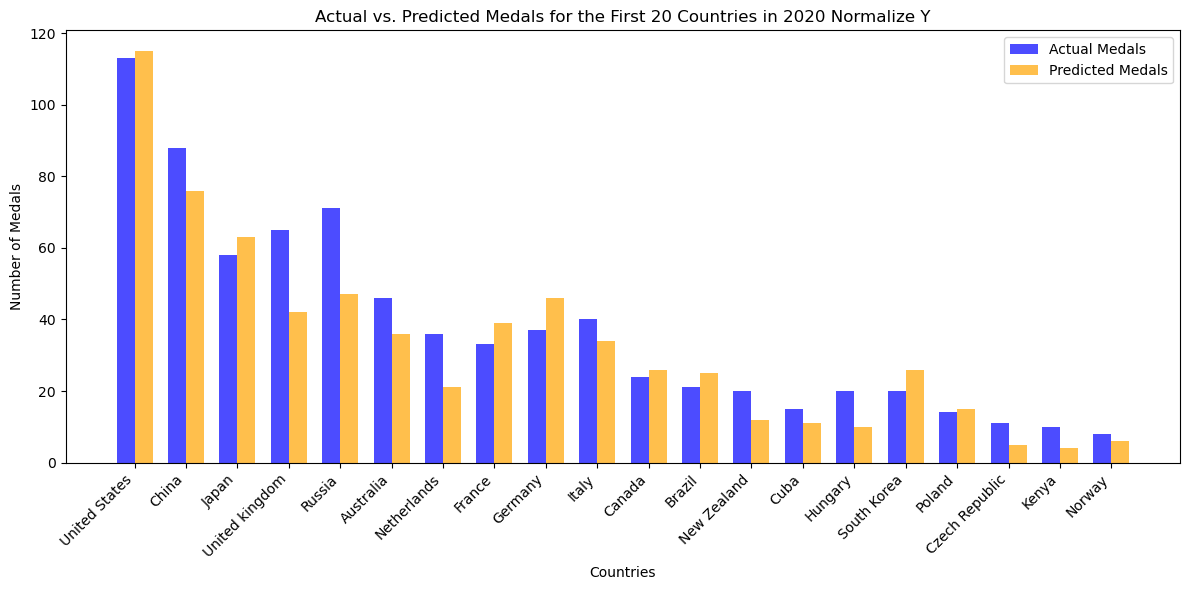

In [33]:
import matplotlib.pyplot as plt

# Prepare data for plotting for the first 20 countries
first_20_countries = test_data.head(20)  # Get the first 20 rows
countries = first_20_countries['Country']
actual_medals = first_20_countries['Total_Medals']
predicted_medals = first_20_countries['Predicted_Medals']

# Set up the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(countries))

# Create bars for actual and predicted values
bar1 = plt.bar(index, actual_medals, bar_width, label='Actual Medals', color='blue', alpha=0.7)
bar2 = plt.bar(index + bar_width, predicted_medals, bar_width, label='Predicted Medals', color='orange', alpha=0.7)

# Adding titles and labels
plt.title('Actual vs. Predicted Medals for the First 20 Countries in 2020 Normalize Y')
plt.xlabel('Countries')
plt.ylabel('Number of Medals')
plt.xticks(index + bar_width / 2, countries, rotation=45, ha='right')  # Rotate country labels
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

### try  Cross-Validation

#### Y , RF - best model 

In [50]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

# Assuming df5 is your DataFrame containing all data
df5 = pd.read_csv('df5.csv')
# Define train and test data based on the year
train_data = df5[(df5['Year'] >= 1992) & (df5['Year'] <= 2016)]
test_data = df5[df5['Year'] == 2020]

# Define features and target variable for training
X_train = train_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])
y_train = train_data['Total_Medals']  # Using original target variable without normalization

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')

# Train the model on the full training set
model.fit(X_train, y_train)

# Define features for testing
X_test = test_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])

# Make predictions
predictions = model.predict(X_test)

# Ensure predictions are non-negative
predictions = np.maximum(predictions, 0)  # Set minimum value to 0

# Adjust predictions to match total medals count in the test data
total_actual_medals = test_data['Total_Medals'].sum()
total_predicted_medals = predictions.sum()

# Scale predictions proportionally to match the total actual medals count
if total_predicted_medals > 0:
    scaling_factor = total_actual_medals / total_predicted_medals
    predictions = predictions * scaling_factor

# Ensure predictions are integers after scaling
predictions = np.rint(predictions).astype(int)  # Round and convert to integers

# Add predictions to the test_data DataFrame
test_data['Predicted_Medals'] = predictions

# Select relevant columns for final output
final_output = test_data[['Country', 'Predicted_Medals', 'Total_Medals']]
print(final_output)

# Calculate R-squared and Adjusted R-squared for the test set
y_test_actual = test_data['Total_Medals']
r_squared_test = r2_score(y_test_actual, predictions)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (len(y_test_actual) - 1) / (len(y_test_actual) - X_test.shape[1] - 1)

# Calculate Standard Error for the test set
standard_error_test = np.sqrt(mean_squared_error(y_test_actual, predictions))

# Calculate MSE for the training set
train_predictions = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

# Calculate R-squared for the training set
train_r_squared = r2_score(y_train, train_predictions)

# Print cross-validation and performance metrics
print(f'Cross-Validation R² Scores: {cv_scores}')
print(f'Mean Cross-Validation R² Score: {np.mean(cv_scores)}')

print(f'Test Set Multiple R: {np.sqrt(r_squared_test)}')  # R is the square root of R²
print(f'Test Set R-squared (R²): {r_squared_test}')
print(f'Test Set Adjusted R-squared: {adjusted_r_squared_test}')
print(f'Test Set Standard Error: {standard_error_test}')
print(f'Training Set Mean Squared Error (MSE): {train_mse}')


            Country  Predicted_Medals  Total_Medals
535   United States               128           113
536           China                80            88
537           Japan                91            58
538  United kingdom                50            65
539          Russia                49            71
..              ...               ...           ...
621           Ghana                 1             1
622         Grenada                 3             1
623          Kuwait                 3             1
624         Moldova                 3             1
625           Syria                 1             1

[91 rows x 3 columns]
Cross-Validation R² Scores: [0.91695863 0.77465277 0.89106203 0.91130521 0.9215994 ]
Mean Cross-Validation R² Score: 0.8831156064102981
Test Set Multiple R: 0.9453560719066146
Test Set R-squared (R²): 0.8936981026907044
Test Set Adjusted R-squared: 0.874116174238992
Test Set Standard Error: 6.2423579653070975
Training Set Mean Squared Error (MSE): 5.3

C:\Users\Asus\AppData\Local\Temp\ipykernel_26372\131777622.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Medals'] = predictions


In [7]:
final_output.head(20)

,Country,Predicted_Medals,Total_Medals
535,United States,128,113
536,China,80,88
537,Japan,91,58
538,United kingdom,50,65
539,Russia,49,71
540,Australia,40,46
541,Netherlands,23,36
542,France,44,33
543,Germany,53,37
544,Italy,38,40


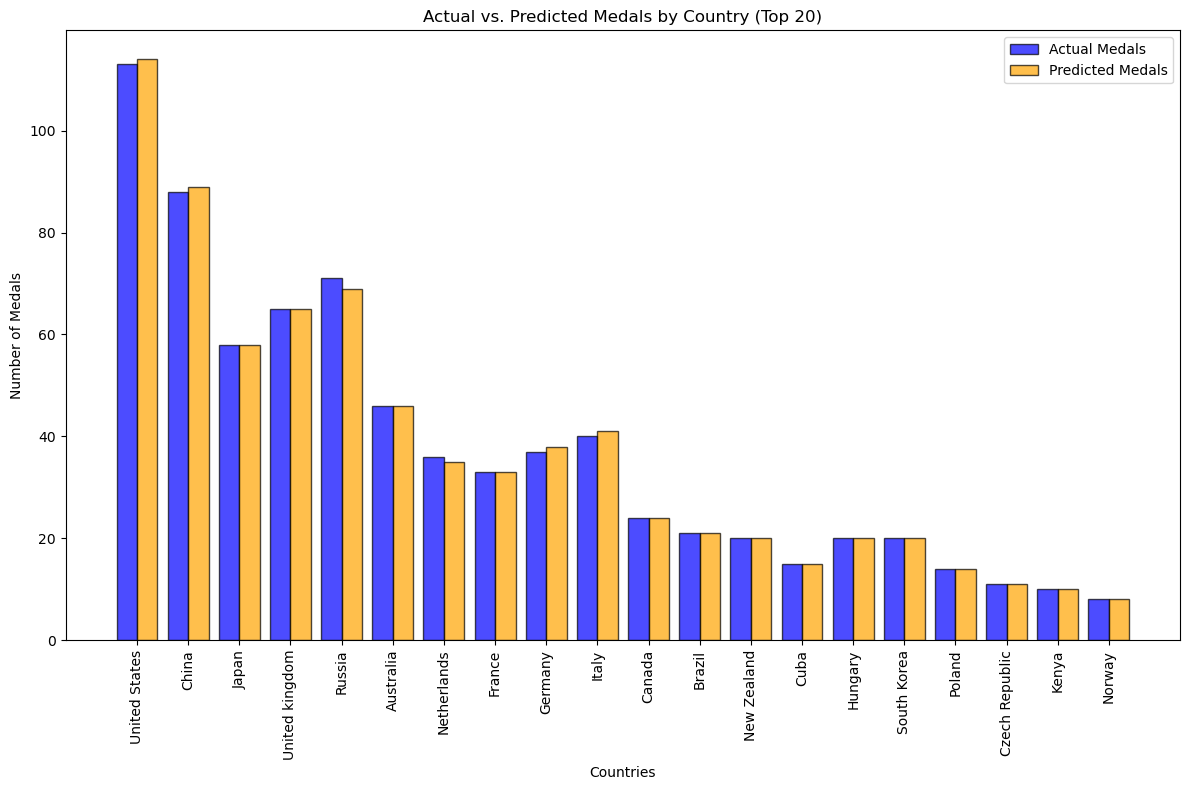

In [45]:

import matplotlib.pyplot as plt

# Limit the data to the first 20 countries
test_data_20 = test_data.head(20)
y_test_actual_20 = y_test_actual.head(20)
predictions_20 = predictions[:20]

# Create an index for the x-axis
x = np.arange(len(test_data_20['Country']))

# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Bar plot for actual medals
plt.bar(x - 0.2, y_test_actual_20, width=0.4, label='Actual Medals', color='blue', edgecolor='k', alpha=0.7)

# Bar plot for predicted medals
plt.bar(x + 0.2, predictions_20, width=0.4, label='Predicted Medals', color='orange', edgecolor='k', alpha=0.7)

# Adding labels and title
plt.xlabel('Countries')
plt.ylabel('Number of Medals')
plt.title('Actual vs. Predicted Medals by Country (Top 20)')
plt.xticks(x, test_data_20['Country'], rotation=90)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


## combine cross-validation and hyperparameter tuning to improve model performance

In [ ]:
## search for best parameters

In [11]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df5 is your DataFrame containing all data

# Define train and test data based on the year
train_data = df5[(df5['Year'] >= 1992) & (df5['Year'] <= 2016)]
test_data = df5[df5['Year'] == 2020]

# Define features and target variable for training
X_train = train_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])
y_train = train_data['Total_Medals']  # Using original target variable without normalization

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [200, 500],                  # Number of trees
    'max_depth': [10, 20, 30],                   # Depth of trees
    'max_features': ['sqrt', 'log2'],            # Number of features to consider for splitting
    'min_samples_split': [2, 5, 10],             # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],               # Minimum number of samples required in a leaf node
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Set up cross-validation with 5 folds
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with cross-validation and hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='r2', n_jobs=-1, verbose=2)

# Fit the model with grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model after hyperparameter tuning
best_rf = grid_search.best_estimator_

# Output the best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Define features for testing
X_test = test_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])

# Make predictions using the best model
predictions = best_rf.predict(X_test)

# Ensure predictions are non-negative
predictions = np.maximum(predictions, 0)  # Set minimum value to 0

# Adjust predictions to match total medals count in the test data
total_actual_medals = test_data['Total_Medals'].sum()
total_predicted_medals = predictions.sum()

# Scale predictions proportionally to match the total actual medals count
if total_predicted_medals > 0:
    scaling_factor = total_actual_medals / total_predicted_medals
    predictions = predictions * scaling_factor

# Ensure predictions are integers after scaling
predictions = np.rint(predictions).astype(int)  # Round and convert to integers

# Add predictions to the test_data DataFrame
test_data['Predicted_Medals'] = predictions

# Select relevant columns for final output
final_output = test_data[['Country', 'Predicted_Medals', 'Total_Medals']]
print(final_output)

# Calculate R-squared and Adjusted R-squared for the test set
y_test_actual = test_data['Total_Medals']
r_squared_test = r2_score(y_test_actual, predictions)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (len(y_test_actual) - 1) / (len(y_test_actual) - X_test.shape[1] - 1)

# Calculate Standard Error for the test set
standard_error_test = np.sqrt(mean_squared_error(y_test_actual, predictions))

# Calculate MSE for the training set
train_predictions = best_rf.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

# Calculate R-squared for the training set
train_r_squared = r2_score(y_train, train_predictions)

# Print performance metrics
print(f'Test Set Multiple R: {np.sqrt(r_squared_test)}')  # R is the square root of R²
print(f'Test Set R-squared (R²): {r_squared_test}')
print(f'Test Set Adjusted R-squared: {adjusted_r_squared_test}')
print(f'Test Set Standard Error: {standard_error_test}')
print(f'Training Set Mean Squared Error (MSE): {train_mse}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
            Country  Predicted_Medals  Total_Medals
535   United States               115           113
536           China                75            88
537           Japan                59            58
538  United kingdom                42            65
539          Russia                46            71
..              ...               ...           ...
621           Ghana                 3             1
622         Grenada                 4             1
623          Kuwait                 3             1
624         Moldova                 3             1
625           Syria                 2             1

[91 rows x 3 columns]
Test Set Multiple R: 0.9507631513389048
Test Set R-squared (R²): 0.9039505699438851
Test Set Adjusted R-squared: 0.8862572538809166
Test Set Standard Error: 

C:\Users\Asus\AppData\Local\Temp\ipykernel_26372\2714093432.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Medals'] = predictions


In [ ]:
#2.

In [12]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Define train and test data based on the year
train_data = df5[(df5['Year'] >= 1992) & (df5['Year'] <= 2016)]
test_data = df5[df5['Year'] == 2020]

# Define features and target variable for training
X_train = train_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])
y_train = train_data['Total_Medals']

# Define features for testing
X_test = test_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])
y_test_actual = test_data['Total_Medals']

# Initialize RandomForest with best parameters
best_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=30,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Fit the model using cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-validated R-squared scores: {cv_scores}')
print(f'Mean R-squared: {np.mean(cv_scores)}')

# Train model on full training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = best_model.predict(X_test)

# Ensure predictions are non-negative
predictions = np.maximum(predictions, 0)  # Set minimum value to 0

# Adjust predictions to match total medals count in the test data
total_actual_medals = test_data['Total_Medals'].sum()
total_predicted_medals = predictions.sum()

# Scale predictions proportionally to match the total actual medals count
if total_predicted_medals > 0:
    scaling_factor = total_actual_medals / total_predicted_medals
    predictions = predictions * scaling_factor

# Ensure predictions are integers after scaling
predictions = np.rint(predictions).astype(int)  # Round and convert to integers

# Add predictions to the test_data DataFrame
test_data['Predicted_Medals'] = predictions

# Select relevant columns for final output
final_output = test_data[['Country', 'Predicted_Medals', 'Total_Medals']]
print(final_output)

# Calculate R-squared and Adjusted R-squared for the test set
r_squared_test = r2_score(y_test_actual, predictions)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (len(y_test_actual) - 1) / (len(y_test_actual) - X_test.shape[1] - 1)

# Calculate Standard Error for the test set
standard_error_test = np.sqrt(mean_squared_error(y_test_actual, predictions))

# Calculate MSE for the training set
train_predictions = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

# Calculate R-squared for the training set
train_r_squared = r2_score(y_train, train_predictions)

# Print performance metrics
print(f'Test Set R-squared (R²): {r_squared_test}')
print(f'Test Set Adjusted R-squared: {adjusted_r_squared_test}')
print(f'Test Set Standard Error: {standard_error_test}')
print(f'Training Set Mean Squared Error (MSE): {train_mse}')
print(f'Training Set R-squared: {train_r_squared}')


Cross-validated R-squared scores: [ 0.59073382  0.82193557 -0.01889132  0.56886606  0.59484645]
Mean R-squared: 0.5114981146125215
            Country  Predicted_Medals  Total_Medals
535   United States               115           113
536           China                74            88
537           Japan                66            58
538  United kingdom                42            65
539          Russia                48            71
..              ...               ...           ...
621           Ghana                 3             1
622         Grenada                 4             1
623          Kuwait                 3             1
624         Moldova                 3             1
625           Syria                 2             1

[91 rows x 3 columns]
Test Set R-squared (R²): 0.9082074423121649
Test Set Adjusted R-squared: 0.8912982869486163
Test Set Standard Error: 5.800719925005141
Training Set Mean Squared Error (MSE): 5.308279237383178
Training Set R-squared: 0.9845

C:\Users\Asus\AppData\Local\Temp\ipykernel_26372\1993891089.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Medals'] = predictions


In [24]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import zscore

# Assuming df5 is your DataFrame containing all data

# Z-score normalization of the target variable
df5['Total_Medals_Z'] = zscore(df5['Total_Medals'])

# Define train and test data based on the year
train_data = df5[(df5['Year'] >= 1992) & (df5['Year'] <= 2016)]
test_data = df5[df5['Year'] == 2020]

# Define features and target variable for training
X_train = train_data.drop(columns=['Total_Medals', 'Total_Medals_Z', 'Year', 'Country', 'Country_Code'])
y_train = train_data['Total_Medals_Z']

# Initialize the Random Forest model without manually tuning hyperparameters
model = RandomForestRegressor(random_state=42)

# Cross-validation using 5 folds
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')

# Fit the model to the entire training set after cross-validation
model.fit(X_train, y_train)

# Define features for testing
X_test = test_data.drop(columns=['Total_Medals', 'Total_Medals_Z', 'Year', 'Country', 'Country_Code'])

# Make predictions (in Z-score scale)
test_predictions_z = model.predict(X_test)

# Convert predictions back to the original scale using the mean and std from the training data
mean_total_medals = train_data['Total_Medals'].mean()
std_total_medals = train_data['Total_Medals'].std()
predictions = mean_total_medals + (test_predictions_z * std_total_medals)

# Ensure predictions are non-negative
predictions = np.maximum(predictions, 0)

# Adjust predictions to match total medals count in the test data
total_actual_medals = test_data['Total_Medals'].sum()
total_predicted_medals = predictions.sum()

# Scale predictions proportionally to match the total actual medals count
if total_predicted_medals > 0:
    scaling_factor = total_actual_medals / total_predicted_medals
    predictions = predictions * scaling_factor

# Ensure predictions are integers after scaling
predictions = np.rint(predictions).astype(int)  # Round and convert to integers

# Add predictions to the test_data DataFrame
test_data['Predicted_Medals'] = predictions

# Select relevant columns for final output
final_output = test_data[['Country', 'Predicted_Medals', 'Total_Medals']]
print(final_output)

# Calculate R-squared and Adjusted R-squared for the test set
y_test_actual = test_data['Total_Medals']
r_squared_test = r2_score(y_test_actual, predictions)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (len(y_test_actual) - 1) / (len(y_test_actual) - X_test.shape[1] - 1)

# Calculate Standard Error for the test set
standard_error_test = np.sqrt(mean_squared_error(y_test_actual, predictions))

# Print performance metrics
print(f'Test Set Multiple R: {np.sqrt(r_squared_test)}')  # R is the square root of R²
print(f'Test Set R-squared (R²): {r_squared_test}')
print(f'Test Set Adjusted R-squared: {adjusted_r_squared_test}')
print(f'Test Set Standard Error: {standard_error_test}')

# Cross-validation results for training
mean_cv_mse = -np.mean(cv_scores)
print(f'Mean Cross-Validation MSE: {mean_cv_mse}')


            Country  Predicted_Medals  Total_Medals
535   United States               127           113
536           China                84            88
537           Japan                91            58
538  United kingdom                49            65
539          Russia                50            71
..              ...               ...           ...
621           Ghana                 1             1
622         Grenada                 3             1
623          Kuwait                 3             1
624         Moldova                 3             1
625           Syria                 1             1

[91 rows x 3 columns]
Test Set Multiple R: 0.9474783117642261
Test Set R-squared (R²): 0.897715151263588
Test Set Adjusted R-squared: 0.8788732054437227
Test Set Standard Error: 6.123275716028594
Mean Cross-Validation MSE: 0.11134080743938615


C:\Users\Asus\AppData\Local\Temp\ipykernel_26372\3447254625.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Medals'] = predictions
